**LR for linearly seperated data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

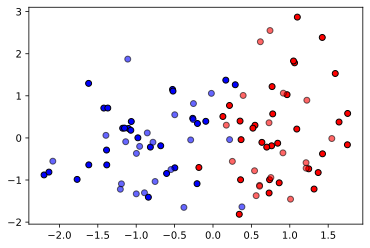

In [2]:
# generate the data sets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# split the training and test sets
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

# plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

fig1 = plt.gcf()
plt.show()

0.95


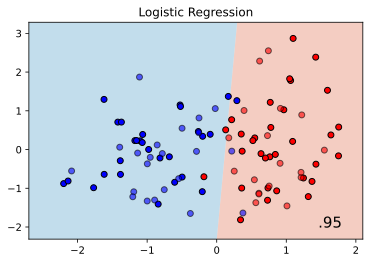

<Figure size 432x288 with 0 Axes>

In [3]:
clf = linear_model.LogisticRegression(tol=0.0001,C=1e5,max_iter=10000)
clf.fit(X, y)
score = clf.score(X_test, y_test)
print(score)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z,0, cmap=cm, alpha=.4)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

name = 'Logistic Regression'
plt.title(name)
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
fig1c = plt.gcf()
plt.show()
plt.draw()
fig1c.savefig('./fig1c.pdf' , format="pdf")

**LR for moon data**

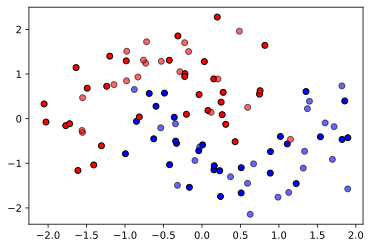

In [4]:
X, y =make_moons(noise=0.3, random_state=0)
# X, y = ds
h = 0.2
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# just plot the dataset first
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

fig2 = plt.gcf()
plt.show()

LR for moon

0.875


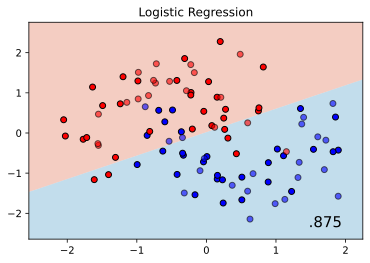

<Figure size 432x288 with 0 Axes>

In [5]:
clf = linear_model.LogisticRegression(tol=0.0001,C=1e5,max_iter=10000)
clf.fit(X, y)
score = clf.score(X_test, y_test)
print(score)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,0, cmap=cm, alpha=.4)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

name = 'Logistic Regression'
plt.title(name)
plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=15, horizontalalignment='right')
fig2l = plt.gcf()
plt.show()
plt.draw()

fig2l.savefig('./fig2l.pdf' , format="pdf")

Polynomial transform for moon data


0.97


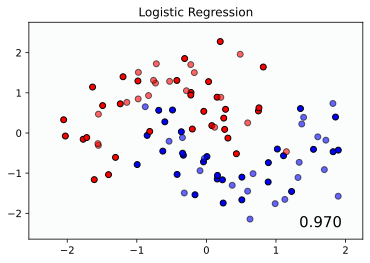

<Figure size 432x288 with 0 Axes>

In [6]:
'''Define polynomial regression, the value of degree can adjust
the characteristics of polynomial'''
poly_reg = PolynomialFeatures(degree=3) 
# Feature processing (get the sample data corresponding to the corresponding feature of the polynomial)
X_poly = poly_reg.fit_transform(X)

# Training model with the transformed data 
model = linear_model.LogisticRegression(C=1e5)
model.fit(X_poly, y)

'''The returned estimates for all classes are ordered by the label of classes.'''
z = model.predict_proba(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1]
# '''Predict class labels for samples in X.'''
# z = model.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))

z = z.reshape(xx.shape)
score = model.score(X_poly, y)
print(score)

# Plot the contour of the classifier
plt.contourf(xx, yy, z,0, cmap=cm, alpha=.4)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

name = 'Logistic Regression'
plt.title(name)
plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score), size=15, horizontalalignment='right')
fig2p = plt.gcf()
plt.show()
plt.draw()
fig2p.savefig('./fig2pl.pdf' , format="pdf")

**circle data**

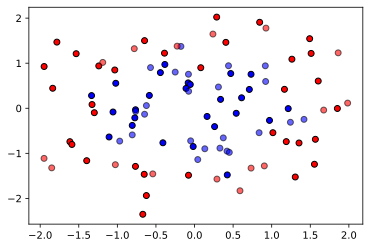

In [7]:
X, y =make_circles(noise=0.2, factor=0.5, random_state=1)
h = 0.2
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

fig3 = plt.gcf()
plt.show()

LR for circle data

0.475


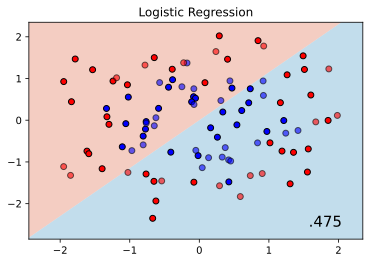

<Figure size 432x288 with 0 Axes>

In [8]:
clf = linear_model.LogisticRegression(tol=0.0001,C=1e5,max_iter=10000)
clf.fit(X, y)
score = clf.score(X_test, y_test)
print(score)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,0, cmap=cm, alpha=.4)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

name = 'Logistic Regression'
plt.title(name)
plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=15, horizontalalignment='right')
fig3l = plt.gcf()
plt.show()
plt.draw()

fig3l.savefig('./fig3l.pdf' , format="pdf")

Polynomial transform for circle data

0.92


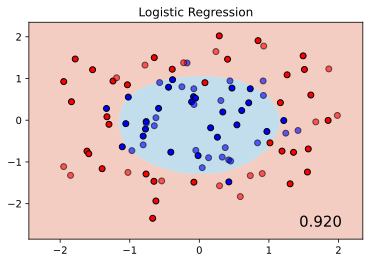

<Figure size 432x288 with 0 Axes>

In [9]:
'''Define polynomial regression, the value of degree can adjust
the characteristics of polynomial'''
poly_reg = PolynomialFeatures(degree=3)
# Feature processing (get the sample data corresponding to the corresponding feature of the polynomial)
X_poly = poly_reg.fit_transform(X)

# Training model with the transformed data
model = linear_model.LogisticRegression(C=1e5,tol=1e-4)
model.fit(X_poly, y)

'''The returned estimates for all classes are ordered by the label of classes.'''
z = model.predict_proba(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1]
# '''Predict class labels for samples in X.'''
# z = model.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))

z = z.reshape(xx.shape)
score = model.score(X_poly, y)
print(score)

# Plot the contour of the classifier
plt.contourf(xx, yy, z,0, cmap=cm, alpha=.4)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

name = 'Logistic Regression'
plt.title(name)
plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score), size=15, horizontalalignment='right')
fig3p = plt.gcf()
plt.show()
plt.draw()
fig3p.savefig('./fig3pl.pdf' , format="pdf")